# Libraries

In [1]:
#%pip install transformers datasets
#%pip install accelerate evaluate rouge_score sentencepiece
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#%pip install -U scikit-learn
#%pip install matplotlib numpy
#%pip install transformers
#%pip install peft

In [2]:
#%pip install --upgrade transformers accelerate

# 1. Đọc dữ liệu

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('.\Dataset_articles_NoID.csv')
df.head(10)

,URL,Title,Summary,Contents,Date,Author(s),Category,Tags
0,https://laodong.vn/bat-dong-san/thong-tin-ngoc...,"Thông tin “Ngọc Trinh mua đất ở Bảo Lộc"" chỉ l...","Lâm Đồng - Lãnh đạo thành phố Bảo Lộc, Lâm Đồn...","Những ngày vừa qua, trên trang Facebook chính ...","Thứ sáu, 20/05/2022 08:56 (GMT+7)",Phương Nhiên,Bất động sản,"['Lâm Đồng', 'Ngọc Trinh', 'Chiêu trò', 'Giá đ..."
1,https://laodong.vn/bat-dong-san/lo-hong-trong-...,Lỗ hổng trong việc thẩm tra năng lực tài chính...,TPHCM - Việc không thể cưỡng chế thuế của hai ...,"Theo thông tin từ Cục Thuế TP.HCM, hiện cơ qua...","Thứ sáu, 20/05/2022 08:10 (GMT+7)",Gia Miêu,Bất động sản,"['Thủ Thiêm', 'Đấu giá đất']"
2,https://laodong.vn/bat-dong-san/som-hoan-thien...,Sớm hoàn thiện các dự án nhà ở xã hội để CNLĐ ...,"Hiện trên địa bàn tỉnh Ninh Bình có 32 khu, cụ...",CNLĐ mong muốn sớm được tiếp cận với nhà ở xã ...,"Thứ sáu, 20/05/2022 07:47 (GMT+7)",NGUYỄN TRƯỜNG,Bất động sản,"['Dự án', 'Nhà ở xã hội', 'Dự án nhà ở xã hội'..."
3,https://laodong.vn/bat-dong-san/chi-tiet-ho-so...,Chi tiết hồ sơ hoàn công nhà ở năm 2022,Hoàn công nhà ở với ý nghĩa là điều kiện để đư...,Hoàn công nhà ở là một thủ tục hành chính tron...,"Thứ sáu, 20/05/2022 06:44 (GMT+7)",Kim Nhung (T/H),Bất động sản,"['Giấy phép xây dựng', 'Hồ sơ hoàn công', 'nhà..."
4,https://laodong.vn/bat-dong-san/khoi-tao-khong...,"Khởi tạo không gian sống đẳng cấp, đón sóng đầ...",Có rất nhiều lý do khiến những dự án thấp nội ...,Đi dọc đường Lê Văn Lương kéo dài xuống khu Dư...,"Thứ năm, 19/05/2022 15:30 (GMT+7)",Huyền Nguyễn,Bất động sản,['An Quý Villa']
5,https://laodong.vn/bat-dong-san/can-canh-khu-d...,"Cận cảnh Khu đô thị Thanh Hà bất ngờ bị ""cò"" đ...",Khu đô thị Thanh Hà Cienco 5 (thuộc quận Hà Đô...,"Những ngày qua, đất khu đô thị Thanh Hà Cienco...","Thứ năm, 19/05/2022 14:21 (GMT+7)",CAO NGUYÊN,Bất động sản,"['Khu đô thị', 'Xây dựng', 'Khu đô thị Thanh ..."
6,https://laodong.vn/quy-hoach/tiep-tuc-cuong-ch...,Tiếp tục cưỡng chế 15 biệt thự Ocean View Nha ...,"Khánh Hòa - Bên cạnh việc tổ chức cưỡng chế, c...","Ngày 19.5, UBND phường Vĩnh Trường cho biết, v...","Thứ năm, 19/05/2022 09:27 (GMT+7)",Hữu Long,Bất động sản,"['Khánh Hòa', 'Nha Trang', 'Ocean View Nha Tra..."
7,https://laodong.vn/bat-dong-san/nguyen-tac-thi...,Nguyên tắc thiết kế nhà ở công vụ,Dưới đây là nguyên tắc thiết kế nhà ở công vụ ...,Nhà ở công vụ là loại hình nhà ở được xây dựng...,"Thứ năm, 19/05/2022 08:26 (GMT+7)",Kim Nhung (T/H),Bất động sản,"['Nhà công vụ', 'Nhà ở công vụ', 'nhà ở', 'Thi..."
8,https://laodong.vn/bat-dong-san/thanh-hoa-dung...,Thanh Hoá: Dừng đột ngột phiên đấu giá dự án t...,Thanh Hoá - Dự án Trường tiểu học và THCS dân ...,"Từ ""rút ống thở"" nửa chừng… Ngày 17.5.2004, UB...","Thứ tư, 18/05/2022 18:28 (GMT+7)",Xuân Hùng,Bất động sản,"['Đất vàng', 'Thanh Hoá', 'Cty Tây Đô', 'Dự á..."
9,https://laodong.vn/nha-dep/kinh-nghiem-thue-vi...,"Kinh nghiệm thuê villa, homestay chất lượng kh...","Chuyến du lịch sắp tới, bạn đang phân vân giữa...",Villa là gì? Villa hay được gọi là biệt thự là...,"Thứ tư, 18/05/2022 16:30 (GMT+7)",Minh Huy (T/H),Bất động sản,"['Du lịch', 'Tiết kiệm chi phí', 'Nghỉ dưỡng',..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313320 entries, 0 to 313319
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   URL        313320 non-null  object
 1   Title      313320 non-null  object
 2   Summary    313140 non-null  object
 3   Contents   307763 non-null  object
 4   Date       313320 non-null  object
 5   Author(s)  312499 non-null  object
 6   Category   313320 non-null  object
 7   Tags       313320 non-null  object
dtypes: object(8)
memory usage: 19.1+ MB


In [6]:
df.describe()

,URL,Title,Summary,Contents,Date,Author(s),Category,Tags
count,313320,313320,313140,307763,313320,312499,313320,313320
unique,290282,288833,288922,284633,252777,19087,39,245322
top,https://laodong.vn/cong-doan/cuoi-thang-nhieu-...,Dự báo thời tiết 10 ngày tới ở cả ba miền,Cùng báo Lao Động điểm qua những tin tức Hà Nộ...,Giá vàng trong nước Nguồn: Công ty CP Dịch vụ...,"Thứ bảy, 03/04/2021 07:00 (GMT+7)",Thanh Hà,Xã hội,['Hà Nội']
freq,5,69,49,47,14,5297,58776,1477


In [7]:
df.isnull().sum()

URL             0
Title           0
Summary       180
Contents     5557
Date            0
Author(s)     821
Category        0
Tags            0
dtype: int64

## Trích chọn đặc trưng

Vì sử dụng để fine-tuning mô hình ngôn ngữ để tóm tắt tin tức nên sẽ lấy ra 2 đặc trưng là Summary và Content

In [8]:
selected_df = df[['Contents','Summary']]
selected_df

,Contents,Summary
0,"Những ngày vừa qua, trên trang Facebook chính ...","Lâm Đồng - Lãnh đạo thành phố Bảo Lộc, Lâm Đồn..."
1,"Theo thông tin từ Cục Thuế TP.HCM, hiện cơ qua...",TPHCM - Việc không thể cưỡng chế thuế của hai ...
2,CNLĐ mong muốn sớm được tiếp cận với nhà ở xã ...,"Hiện trên địa bàn tỉnh Ninh Bình có 32 khu, cụ..."
3,Hoàn công nhà ở là một thủ tục hành chính tron...,Hoàn công nhà ở với ý nghĩa là điều kiện để đư...
4,Đi dọc đường Lê Văn Lương kéo dài xuống khu Dư...,Có rất nhiều lý do khiến những dự án thấp nội ...
...,...,...
313315,NaN,"Bà Dương Thị Tuyết ở thị trấn Khe Sanh, huyện ..."
313316,NaN,"Ngày 25.7, Đại diện Chương trình “Tấm lưới ngh..."
313317,NaN,"Ngày 17.7, lãnh đạo Quỹ TLV Lao Động và LĐLĐ t..."
313318,NaN,Nhà báo Trần Đình Chính (tức Trần Hoài Thu) - ...


## Xử lý missing data và duplicate data

In [9]:
selected_df.isnull().sum()

Contents    5557
Summary      180
dtype: int64

In [10]:
cleaned_df = selected_df.dropna()
cleaned_df.isnull().sum()

Contents    0
Summary     0
dtype: int64

In [11]:
print(f'Số lượng giá trị trước khi xử lý null: {len(selected_df)}')
print(f'Số lượng giá trị sau khi xử lý null: {len(cleaned_df)}')

Số lượng giá trị trước khi xử lý null: 313320
Số lượng giá trị sau khi xử lý null: 307598


In [12]:
print(f"Số lượng giá trị trước khi xử lý trùng lặp: {len(cleaned_df)}")
cleaned_df.drop_duplicates(inplace=True)
print(f"Số lượng giá trị sau khi xử lý trùng lặp: {len(cleaned_df)}")

Số lượng giá trị trước khi xử lý trùng lặp: 307598
Số lượng giá trị sau khi xử lý trùng lặp: 284664


C:\Users\Acer\AppData\Local\Temp\ipykernel_53104\764404001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


# 2. Chia tập dữ liệu huấn luyện

In [13]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

d:\Programming\Research\Summarization\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
cleaned_df['input'] = 'tóm tắt:' + df['Contents']
cleaned_df['output'] = df['Summary']

dataset = cleaned_df[['input','output']]

train_data, val_data = train_test_split(dataset,test_size=0.2, random_state=42)

# Chuyển đổi Pandas Dataframe thành Hugging Face Dataset
train_data = Dataset.from_pandas(train_data)
val_data = Dataset.from_pandas(val_data)

C:\Users\Acer\AppData\Local\Temp\ipykernel_53104\2391149540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['input'] = 'tóm tắt:' + df['Contents']
C:\Users\Acer\AppData\Local\Temp\ipykernel_53104\2391149540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['output'] = df['Summary']


In [15]:
print(f"Train dataset: {len(train_data)}")
print(f"Validation dataset: {len(val_data)}")
print(f"Ex: {train_data[0]}")

Train dataset: 227731
Validation dataset: 56933
Ex: {'input': 'tóm tắt:Zalgiris Kaunas, đại diện bóng rổ Lithuania, dù đang ngụp lặn dưới đáy BXH Turkish Airlines EuroLeague 2021-2022 nhưng họ được đánh giá là một đội bóng luôn biết cách cản chân các ông lớn của giải trong giai đoạn cuối mùa Regular Season. Chính vì thế, việc đối đầu với Zalgiris ở thời điểm hiện tại đối với FC Barcelona Basquet tưởng chừng dễ mà lại hóa ra khó.\xa0 FC Barcelona và những sự trở lại cần thiết trước trận đấu Đội bóng của huấn luyện viên Jasikevicius hiện đang chễm chệ trên vị trí số 1 Regular Season. Tuy nhiên, từ vòng đấu thứ 20 cho tới gần đây, đội hình của FC Barcelona liên tục gặp sự xáo trộn do có nhiều thành viên dương tính với COVID-19. Tiêu biểu có thể kể đến như hậu vệ điều phối bóng Nick Calathes, tay ném Arbines hay 2 trung phong Smits và Oriola. Chính bởi sự thiếu hụt nhân sự như vậy, FC Barcelona đã đôi lần hụt hơi trước sự đeo bám gắt gao của đại kình địch Real Madrid. Nhưng thần may mắn đã

# 3. Khai phá dữ liệu

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
cleaned_df['content_len'] = cleaned_df['Contents'].apply(lambda x: len(x.split()))
cleaned_df['summary_len'] = cleaned_df['Summary'].apply(lambda x: len(x.split()))

print("Thống kê độ dài bài báo:")
print(cleaned_df['content_len'].describe())
print()
print("Thống kê độ dài tóm tắt:")
print(cleaned_df['summary_len'].describe())

C:\Users\Acer\AppData\Local\Temp\ipykernel_53104\2687444253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['content_len'] = cleaned_df['Contents'].apply(lambda x: len(x.split()))


Thống kê độ dài bài báo:
count    284664.000000
mean        501.398340
std         383.300744
min           1.000000
25%         303.000000
50%         441.000000
75%         613.000000
max       40265.000000
Name: content_len, dtype: float64

Thống kê độ dài tóm tắt:
count    284664.000000
mean         41.649144
std          16.637249
min           2.000000
25%          30.000000
50%          38.000000
75%          50.000000
max         333.000000
Name: summary_len, dtype: float64


C:\Users\Acer\AppData\Local\Temp\ipykernel_53104\2687444253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['summary_len'] = cleaned_df['Summary'].apply(lambda x: len(x.split()))


Biểu đồ phân phối

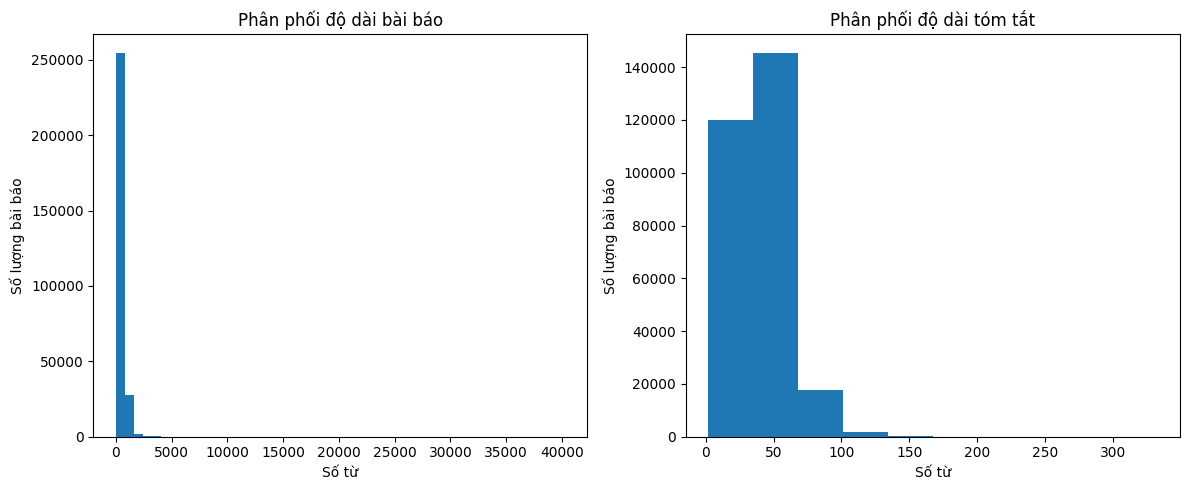

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
cleaned_df['content_len'].plot(kind='hist', bins=50, title='Phân phối độ dài bài báo')
plt.xlabel('Số từ')
plt.ylabel('Số lượng bài báo')

plt.subplot(1,2,2)
cleaned_df['summary_len'].plot(kind='hist', title='Phân phối độ dài tóm tắt')
plt.xlabel('Số từ')
plt.ylabel('Số lượng bài báo')

plt.tight_layout()
plt.show()

# 4. Chuẩn bị fine-tuning

In [19]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [20]:
tokenizer = AutoTokenizer.from_pretrained("VietAI/vit5-base-vietnews-summarization")

max_input_length = 640
max_target_length = 150

def preprocessing(examples):
    inputs = [f"tóm tắt: {article}" for article in examples['input']]
    targets = [summary for summary in examples['output']]

    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True, padding=True)

    labels = tokenizer(text_target=targets, max_length=max_target_length, truncation=True, padding=True)
    
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [21]:
columns_to_remove = ['input', 'output', '__index_level_0__']

tokenized_train_data = train_data.map(
    preprocessing, 
    batched=True, 
    remove_columns=columns_to_remove
)
tokenized_valid_data = val_data.map(
    preprocessing, 
    batched=True, 
    remove_columns=columns_to_remove
)


Map: 100%|██████████| 61520/61520 [00:42<00:00, 1447.96 examples/s]


In [22]:
print("Kiểm tra dữ liệu tokenized:")
sample = tokenized_train_data[0]
for key, value in sample.items():
    if isinstance(value, list):
        print(f"{key}: type={type(value)}, length={len(value)}")
    else:
        print(f"{key}: type={type(value)}, value={value}")

Kiểm tra dữ liệu tokenized:
input_ids: type=<class 'list'>, length=640
attention_mask: type=<class 'list'>, length=640
labels: type=<class 'list'>, length=150


# 5. Huấn luyện

In [23]:
import torch
from transformers import DataCollatorForSeq2Seq, TrainingArguments, Trainer
import evaluate
from peft import LoraConfig, get_peft_model, TaskType, PeftModel
from safetensors.torch import load_file

In [24]:
model = AutoModelForSeq2SeqLM.from_pretrained("VietAI/vit5-base-vietnews-summarization")

lora_config = LoraConfig(
    r=8,  # Rank của ma trận LoRA. Giá trị nhỏ hơn (ví dụ 8, 16, 32) sẽ tiết kiệm VRAM hơn.
    lora_alpha=16, # Hệ số tỷ lệ cho LoRA. Thường gấp đôi r.
    target_modules=["q", "v"], # Các module để áp dụng LoRA (thường là query và value trong attention)
    lora_dropout=0.2, # Dropout cho các lớp LoRA
    bias="none", # Không huấn luyện bias
    task_type=TaskType.SEQ_2_SEQ_LM, # Loại tác vụ, TaskType.SEQ_2_SEQ_LM là phù hợp cho tóm tắt (Encoder-Decoder)
)

model = get_peft_model(model,lora_config)
model.print_trainable_parameters()

trainable params: 884,736 || all params: 226,835,712 || trainable%: 0.3900


In [25]:
# Fine-tuning mô hình đã được fine-tuning tốt nhất được huấn luyện ở lần trước
# Đường dẫn đến thư mục chứa mô hình tốt nhất của lần huấn luyện trước
best_model_path = "./my_vit5_summarization_model"
base_model = AutoModelForSeq2SeqLM.from_pretrained("VietAI/vit5-base-vietnews-summarization")

model = get_peft_model(base_model,lora_config)

model.load_state_dict(load_file(f"{best_model_path}/adapter_model.safetensors"), strict = False)
model.print_trainable_parameters()

trainable params: 884,736 || all params: 226,835,712 || trainable%: 0.3900


In [26]:
model.to("cuda" if torch.cuda.is_available() else "cpu")
print(f"Huấn luyện trên: {'GPU' if torch.cuda.is_available() else 'CPU'}")

Huấn luyện trên: GPU


In [27]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

metric = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    
    # Xử lý predictions
    if isinstance(predictions, tuple):
        predictions = predictions[0]  # Lấy logits nếu predictions là tuple
    
    # Nếu predictions là logits (3D array), lấy argmax để có token IDs
    if len(predictions.shape) == 3:
        predictions = np.argmax(predictions, axis=-1)
    
    # Chuyển đổi sang numpy array và đảm bảo kiểu int64
    predictions = np.array(predictions, dtype=np.int64)
    labels = np.array(labels, dtype=np.int64)
    
    # Decode predictions
    decoded_predictions = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    
    # Thay thế -100 trong labels và decode
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # Xử lý chuỗi rỗng để tránh lỗi ROUGE
    decoded_predictions = [pred.strip() if pred.strip() else " " for pred in decoded_predictions]
    decoded_labels = [label.strip() if label.strip() else " " for label in decoded_labels]
    
    # Tính ROUGE scores
    try:
        result = metric.compute(predictions=decoded_predictions, references=decoded_labels, use_stemmer=True)
        result = {k: round(v * 100, 4) for k, v in result.items()}
    except Exception as e:
        print(f"Error computing ROUGE: {e}")
        # Trả về giá trị mặc định nếu có lỗi
        result = {"rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0, "rougeLsum": 0.0}
    
    return result

In [28]:
"""training_args = TrainingArguments(
    output_dir="./vit5_summarization_model_results",
    #num_train_epochs=3, # Lần 1, 2 
    #num_train_epochs=2, # Lần 5, 6
    num_train_epochs=1, # Lần 3, 4, 7, 8, 9, 10, 11, 12
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    #gradient_accumulation_steps=16,
    fp16=True,
    #save_steps=100, # Lần 1, 2, 8, 9, 10, 12
    #save_steps=200, # Lần 3, 4, 5, 7, 11
    save_steps=1000,# Lần 13
    save_total_limit=3,
    #logging_steps=100, # Lần 1, 2, 8, 9, 10, 12
    #logging_steps=200, # Lần 3, 4, 5, 7, 11
    logging_steps=1000,# Lần 13
    eval_strategy="steps",
    #eval_steps=100, # Lần 1, 2, 8, 9, 10, 11, 12
    #eval_steps=200, # Lần 3, 4, 5, 7
    #learning_rate=8e-4, # Lần 9
    eval_steps=1000, # Lần 13
    learning_rate=7e-4, # Lần 10, 11, 12
    #learning_rate=5e-4, # Lần 8
    #learning_rate=3e-5, # Lần 7
    #learning_rate=2e-5, # Lần 1, 2, 5, 6
    #learning_rate=1e-5, # Lần 3, 4
    weight_decay=0.01, # Lần 6, 11, 12, 13
    #weight_decay=0.05, # Lần 1, 2, 3, 4, 5, 7, 8, 9, 10
    #warmup_steps=600, # Lần 7
    #warmup_steps=500, # Lần 8, 12
    #warmup_steps=400, # Lần 6, 11
    #warmup_steps=300, # Lần 9, 10
    #warmup_steps=200, # Lần 3, 4, 5
    #warmup_steps=100, # Lần 1,2
    warmup_steps=5000, # Lần 13
    load_best_model_at_end=True,
    metric_for_best_model="rouge1",
    greater_is_better=True,
    report_to="none",
    lr_scheduler_type="cosine", # Lần 6, 7, 8, 9, 10, 11, 12, 13
)"""

'training_args = TrainingArguments(\n    output_dir="./vit5_summarization_model_results",\n    #num_train_epochs=3, # Lần 1, 2 \n    #num_train_epochs=2, # Lần 5, 6\n    num_train_epochs=1, # Lần 3, 4, 7, 8, 9, 10, 11, 12\n    per_device_train_batch_size=1,\n    per_device_eval_batch_size=1,\n    #gradient_accumulation_steps=16,\n    fp16=True,\n    #save_steps=100, # Lần 1, 2, 8, 9, 10, 12\n    #save_steps=200, # Lần 3, 4, 5, 7, 11\n    save_steps=1000,# Lần 13\n    save_total_limit=3,\n    #logging_steps=100, # Lần 1, 2, 8, 9, 10, 12\n    #logging_steps=200, # Lần 3, 4, 5, 7, 11\n    logging_steps=1000,# Lần 13\n    eval_strategy="steps",\n    #eval_steps=100, # Lần 1, 2, 8, 9, 10, 11, 12\n    #eval_steps=200, # Lần 3, 4, 5, 7\n    #learning_rate=8e-4, # Lần 9\n    eval_steps=1000, # Lần 13\n    learning_rate=7e-4, # Lần 10, 11, 12\n    #learning_rate=5e-4, # Lần 8\n    #learning_rate=3e-5, # Lần 7\n    #learning_rate=2e-5, # Lần 1, 2, 5, 6\n    #learning_rate=1e-5, # Lần 3, 4\n    w

In [29]:
training_args = TrainingArguments(
    output_dir="./vit5_summarization_model_results",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,
    fp16=True,
    save_steps=100,
    save_total_limit=1,
    logging_steps=100,
    eval_strategy="steps",
    eval_steps=100,
    learning_rate=7e-4,
    weight_decay=0.015,
    warmup_steps= 500,
    load_best_model_at_end=True,
    metric_for_best_model="rougeL",
    greater_is_better=True,
    report_to="none",
    lr_scheduler_type="cosine",
)

Do giới hạn về phần cứng nên cần chỉ lấy ra một tập mẫu con để huấn luyện

In [30]:
"""
# Lấy tuần tự
num_train_samples_for_test = 6000
num_eval_samples_for_test = 100

tokenized_train_data_subset = tokenized_train_data.select(range(min(num_train_samples_for_test, len(tokenized_train_data))))
tokenized_valid_data_subset = tokenized_valid_data.select(range(min(num_eval_samples_for_test, len(tokenized_valid_data))))"""

'\n# Lấy tuần tự\nnum_train_samples_for_test = 6000\nnum_eval_samples_for_test = 100\n\ntokenized_train_data_subset = tokenized_train_data.select(range(min(num_train_samples_for_test, len(tokenized_train_data))))\ntokenized_valid_data_subset = tokenized_valid_data.select(range(min(num_eval_samples_for_test, len(tokenized_valid_data))))'

In [31]:
# Lấy ngẫu nhiên 
import random

num_train_samples_for_test = 40000
num_eval_samples_for_test = 100

tokenized_train_data_subset = tokenized_train_data.select(random.sample(range(len(tokenized_train_data)), num_train_samples_for_test))
tokenized_valid_data_subset = tokenized_valid_data.select(random.sample(range(len(tokenized_valid_data)), num_eval_samples_for_test))


In [32]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_data_subset,
    eval_dataset=tokenized_valid_data_subset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18912\4142143539.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [33]:
print("Testing DataCollator...")
try:
    # Lấy một vài samples để test
    test_samples = [tokenized_train_data_subset[i] for i in range(min(2, len(tokenized_train_data_subset)))]
    sample_batch = data_collator(test_samples)
    
    print("DataCollator test thành công!")
    print("Batch shapes:")
    for key, value in sample_batch.items():
        if hasattr(value, 'shape'):
            print(f"  {key}: {value.shape}")
        else:
            print(f"  {key}: {type(value)}")
            
except Exception as e:
    print(f"Lỗi khi test DataCollator: {e}")
    import traceback
    traceback.print_exc()

Testing DataCollator...
DataCollator test thành công!
Batch shapes:
  input_ids: torch.Size([2, 640])
  attention_mask: torch.Size([2, 640])
  labels: torch.Size([2, 150])
  decoder_input_ids: torch.Size([2, 150])


In [34]:
try:
    print("Bắt đầu huấn luyện mô hình...")
    trainer.train()
    print("Huấn luyện hoàn tất!")
except Exception as e:
    print(f"Lỗi trong quá trình huấn luyện: {e}")
    import traceback
    traceback.print_exc()

Bắt đầu huấn luyện mô hình...


Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
100,21.044900,1.542397,75.097800,48.557600,64.062300,64.032200
200,1.166800,0.744941,75.615000,49.804400,65.018200,64.974000
300,0.826600,0.694388,75.736900,50.406100,65.336300,65.290900
400,0.786200,0.670900,75.620100,50.258300,65.583100,65.548500
500,0.784200,0.675101,75.798100,50.799000,65.828600,65.793400
600,0.751100,0.654142,76.081000,51.346000,66.233900,66.233100
700,0.719200,0.650229,75.794600,51.072600,66.002300,65.967800
800,0.735600,0.656702,76.038000,50.919000,65.715700,65.731500
900,0.724200,0.647110,75.737100,50.344700,65.689400,65.634200
1000,0.727700,0.645517,76.162400,50.972400,66.201200,66.175300


Huấn luyện hoàn tất!


In [35]:
"""# Khi bị ngắt quãng
# Tiếp tục huấn luyện từ checkpoint cuối cùng
checkpoint_dir = "./vit5_summarization_model_results/checkpoint-16000"
trainer.train(resume_from_checkpoint=checkpoint_dir)"""

'# Khi bị ngắt quãng\n# Tiếp tục huấn luyện từ checkpoint cuối cùng\ncheckpoint_dir = "./vit5_summarization_model_results/checkpoint-16000"\ntrainer.train(resume_from_checkpoint=checkpoint_dir)'

## Kết quả
### Mỗi lần là huấn luyện sẽ sử dụng 1 tập con được trích xuất ra 1 phần và được lấy theo thứ tự.
### Không fine-tuning từ lần huấn luyện trước để so sánh kết quả.
### Lần 1
num_train_samples_for_test = 2500
num_train_samples_for_test = 50
Kết quả lần 1: Rouge1 ~65, Rouge2 ~ 43

### Lần 2
num_train_samples_for_test = 6000
num_eval_samples_for_test = 100
Kết quả lần 2: Rouge1 ~75, Rouge2 ~49

### Lần 3
num_train_samples_for_test = 30000
num_eval_samples_for_test = 100
Kết quả: Tràn VRAM giữa ở step 538/1875, kết quả ở step 400: Rouge1 ~67.78, Rouge2 ~44

### Lần 4
num_train_samples_for_test = 10000
num_eval_samples_for_test = 200
Kết quả: Rouge1 ~66, Rouge2 ~43

## Lần 5
num_train_samples_for_test = 15000
num_eval_samples_for_test = 200
Kết quả: Rouge1 ~75, Rouge2 ~49

## Lần 6
num_train_samples_for_test = 8000
num_eval_samples_for_test = 100
Kết quả: Rouge1 ~75, Rouge2 ~49

## Lần 7
num_train_samples_for_test = 16000
num_eval_samples_for_test = 100
Kết quả: Rouge1 ~76, Rouge2 ~50

## Lần 8
num_train_samples_for_test = 16000
num_eval_samples_for_test = 100
Kết quả: Rouge1 ~76.5, Rouge2 ~52

## Lần 9
num_train_samples_for_test = 16000
num_eval_samples_for_test = 100
Kết quả: Rouge1 ~77, Rouge2 ~52

## Lần 10
num_train_samples_for_test = 16000
num_eval_samples_for_test = 100
Kết quả: Rouge1 ~77, Rouge2 ~52

## Lần 11
num_train_samples_for_test = 17000
num_eval_samples_for_test = 100
Kết quả: Rouge1 ~76.5, Rouge2 ~52

# Lần 12
num_train_samples_for_test = 17000
num_eval_samples_for_test = 100
Kết quả: Rouge1 = 77, rouge2 ~52.5

## Đánh giá

In [36]:
print("\nBắt đầu đánh giá mô hình trên tập validation...")

num_eval_samples_for_final = 50

eval_dataset_for_final = tokenized_valid_data.select(
    range(min(num_eval_samples_for_final, len(tokenized_valid_data)))
)

eval_results = trainer.evaluate(eval_dataset=eval_dataset_for_final)

print("\nKết quả đánh giá cuối cùng:")
print(eval_results)


Bắt đầu đánh giá mô hình trên tập validation...



Kết quả đánh giá cuối cùng:
{'eval_loss': 0.630483090877533, 'eval_rouge1': 77.5324, 'eval_rouge2': 54.0484, 'eval_rougeL': 67.7786, 'eval_rougeLsum': 67.7218, 'eval_runtime': 113.5093, 'eval_samples_per_second': 0.44, 'eval_steps_per_second': 0.44, 'epoch': 1.0}


In [37]:
# Lưu mô hình đã fine-tuned và tokenizer
model_save_path = "./my_vit5_summarization_model"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)
print(f"Huấn luyện hoàn tất và mô hình đã được lưu tại: {model_save_path}")

Huấn luyện hoàn tất và mô hình đã được lưu tại: ./my_vit5_summarization_model


In [34]:
# Tải tokenizer
model_save_path = "./my_vit5_summarization_model"
print(f"Đang tải tokenizer từ: {model_save_path}")
tokenizer = AutoTokenizer.from_pretrained(model_save_path)

# Tải mô hình cơ sở
print(f"Đang tải mô hình cơ sở...")
base_model = AutoModelForSeq2SeqLM.from_pretrained("VietAI/vit5-base-vietnews-summarization")

# Tải LoRA (PEFT) weights đã được huấn luyện
print(f"Đang tải LoRA weights từ: {model_save_path}")
model = PeftModel.from_pretrained(base_model, model_save_path)

# Đặt mô hình ở chế độ eval và chuyển sang GPU
model.to("cuda")
model.eval()

print("Mô hình và tokenizer đã được tải thành công!")

Đang tải tokenizer từ: ./my_vit5_summarization_model
Đang tải mô hình cơ sở...
Đang tải LoRA weights từ: ./my_vit5_summarization_model
Mô hình và tokenizer đã được tải thành công!


In [75]:
# Bài báo copy từ trên mạng
article_1 = """
Nửa đầu năm, Thảo Cầm Viên đón gần triệu lượt khách, nhờ đó có lãi hơn 3 tỷ đồng, vượt lợi nhuận cả năm giai đoạn 2014-2022.

Theo báo cáo tài chính 6 tháng đầu năm, Công ty TNHH MTV Thảo Cầm Viên Sài Gòn bán ra gần 994.700 vé, tăng khoảng 13% so với cùng kỳ năm trước. Nếu so với lượt khách ghi nhận trong cả năm trước, con số này tương đương 63%.

Trong đó, dịch vụ tour đêm được mở từ 19/3 đến nay bán được hơn nghìn vé. Tour chỉ nhận tối đa 40 khách, chia thành 2 khung giờ vào tối thứ Bảy hằng tuần, tập trung khám phá tập tính của những con vật hoạt động về đêm nhưng vẫn có những quy định đặc biệt để tránh ảnh hưởng đến những loài khác.

Với gần triệu lượt khách ghé thăm, hoạt động bán vé vào cổng mang về gần 56,6 tỷ đồng cho Thảo Cầm Viên. Song song đó, họ có thêm doanh thu ở các mảng kinh doanh khác, nổi bật có giải khát - ẩm thực, trò chơi, vé xe ôtô và xe gắn máy theo ngày, vé xe lửa - xe điện.

Tổng lại, Thảo Cầm Viên ghi nhận hơn 82 tỷ đồng doanh thu trong 6 tháng đầu năm, tăng gần 13% so với cùng kỳ năm trước. Trừ đi giá vốn, họ lãi gộp hơn 23,5 tỷ đồng. Công ty còn có thêm hơn 402 triệu đồng doanh thu hoạt động tài chính.

Thảo Cầm Viên nói không với lãi vay nên không tốn chi phí tài chính. Họ cũng không ghi nhận chi phí bán hàng. Nhóm chi phí thường xuyên duy nhất là quản lý doanh nghiệp với hơn 20 tỷ đồng, tăng hơn 26%.

Tổng lại, Thảo Cầm Viên lãi hơn 3,2 tỷ đồng trong 6 tháng đầu năm. Con số này sụt 32% nếu so với cùng kỳ nhưng vẫn vượt lợi nhuận cả năm giai đoạn 2014-2022. Nửa đầu năm trước, doanh nghiệp này có lãi chủ yếu nhờ quý đầu năm, trong khi lợi nhuận quý II chỉ 0,3 tỷ đồng. Còn ở quý II năm nay, công ty vẫn lãi khoảng 1 tỷ đồng.

Tính đến cuối tháng 6, tổng tài sản của công ty đạt hơn 877 tỷ đồng, chủ yếu là chi phí xây dựng dở dang và tài sản cố định. Nợ phải trả ghi nhận hơn 30 tỷ đồng, phần lớn là các khoản phải trả người lao động, thuế và các khoản phải nộp Nhà nước.

Công ty TNHH MTV Thảo Cầm Viên là doanh nghiệp 100% vốn thuộc UBND TP HCM, vận hành công trình cùng tên tại phường Sài Gòn (trung tâm Quận 1 cũ). Được xây dựng từ năm 1864 với tên gọi đầu tiên là Vườn Bách Thảo, sau đó được người dân quen gọi là Sở thú. Công trình có tuổi đời hơn 160 năm và trở thành khu bảo tồn, nhân giống, phát triển về động, thực vật.

Từ năm 2015, Thảo Cầm Viên hoạt động tự chủ hoàn toàn về tài chính, ngân sách không hỗ trợ.

Cuối năm trước, Chi cục Thuế quận 1 cũ (TP HCM) ban hành thông báo tiền nợ thuế của Thảo Cầm Viên Sài Gòn tính đến ngày 31/10 là hơn 846 tỷ đồng tính trên tổng diện tích 158.117 m2. Tuy nhiên, lãnh đạo công ty khẳng định họ chỉ dành 5.590 m2, tức chiếm hơn 3,5% tổng diện tích, để kinh doanh dịch vụ. Toàn bộ đất còn lại được làm chuồng trại, cảnh quan công viên và dịch vụ công cộng không vì mục đích lợi nhuận.

Sau đó, UBND TP HCM điều chỉnh giao hơn 96% diện tích đất có mục đích công cộng cho Thảo Cầm Viên quản lý, sử dụng. Với phần đất còn lại để kinh doanh (bãi giữ xe, quầy giải khát, khu ẩm thực, khu trò chơi, văn phòng làm việc...), doanh nghiệp này sẽ tiếp tục thuê theo hình thức trả tiền hằng năm. Căn cứ theo đó, cơ quan thuế cũng được giao tính lại tiền thuê đất cho công ty.
"""

article_2 = """
Vào Biển Đông đêm nay, bão Fengshen sẽ mạnh lên cấp 9 với sức gió 88 km/h và có thể đạt cực đại cấp 11 khi tiến gần đặc khu Hoàng Sa.

Trung tâm Dự báo Khí tượng Thủy văn quốc gia cho biết rạng sáng nay, tâm bão ở phía đông miền Trung Philippines, sức gió mạnh nhất 74 km/h, cấp 8, giật cấp 10 và đang theo hướng tây tây bắc với tốc độ 20 km/h.

Hôm nay, bão vượt qua đảo Luzon của Philippines vào Biển Đông. Được tiếp thêm năng lượng từ biển, Fengshen mạnh lên cấp 9, đến 1h ngày mai thì ở trên vùng biển phía đông của Bắc Biển Đông, tiếp tục giữ hướng tây bắc, tốc độ 20-25 km/h.

Đến 1h ngày 21/10, bão trên vùng biển phía đông của bắc Biển Đông, cách đặc khu Hoàng Sa khoảng 380 km về phía đông bắc, mạnh lên cấp 10, giật cấp 13.

Do tương tác với không khí lạnh từ phía bắc tràn xuống, bão quặt xuống phía nam theo hướng tây tây nam, tốc độ giảm còn 10 km/h. Đến 1h ngày 22/10, bão cách đặc khu Hoàng Sa 190 km, đạt cực đại cấp 11, sức gió 117 km/h.

Đài khí tượng Nhật Bản cho biết bão đang trên đất liền miền Trung Philippines, hôm nay vào Biển Đông với sức gió 65 km/h, đạt cực đại 108 km/h vào ngày 21/10. Đài Hong Kong dự báo gió bão có thể mạnh 120 km/h khi ở phía đông bắc đặc khu Hoàng Sa.

Vùng biển phía đông bắc Biển Đông gió mạnh dần lên từ cấp 6 đến 9, giật cấp 11, sóng biển cao 2,5-5 m. Các ngày 20-22/10, bắc Biển Đông (gồm đặc khu Hoàng Sa) có khả năng chịu tác động của gió cấp 10-11, giật cấp 13. Toàn bộ thuyền hoạt động trong vùng nguy hiểm này có khả năng chịu ảnh hưởng.

Trung tâm Dự báo Khí tượng Thủy văn quốc gia nhận định bão Fengshen khi tương tác với không khí lạnh sẽ giảm cường độ nên khả năng duy trì cấp độ bão vào miền Trung là không cao. Tuy nhiên, hoàn lưu bão kết hợp với không khí lạnh khiến vùng biển bắc, giữa Biển Đông (gồm đặc khu Hoàng Sa), vịnh Bắc Bộ cũng như biển Quảng Trị - Quảng Ngãi có gió cấp 6-8 trở lên, sóng biển cao 3-4 m.

Cùng với đó, trong vài ngày tới, cả hoàn lưu bão Fengshen và không khí lạnh cùng tác động sẽ gây mưa to từ Hà Tĩnh đến Quảng Ngãi vào ngày 23-26/10. Hiện bão còn ở xa, cơ quan khí tượng chưa đưa ra nhận định về lượng mưa.

Từ nay đến cuối năm, Biển Đông dự báo còn khoảng ba cơn bão, áp thấp nhiệt đới, trong đó 1-2 cơn có thể ảnh hưởng đất liền Việt Nam. Từ đầu năm đến nay Biển Đông xuất hiện 11 cơn bão, 4 áp thấp nhiệt đới. Trong đó các cơn bão Wutip, Wipha, Kajiki, Nongfa, Ragasa, Bualoi, Matmo ảnh hưởng trực tiếp hoặc gây mưa lũ lớn cho miền Bắc và Trung.

Thiên tai từ đầu năm đến nay đã làm 241 người chết, mất tích, 389 người bị thương; 261.000 nhà bị hư hỏng, tốc mái; 594.000 ha lúa, hoa màu, cây trồng khác bị ngập úng; 30.800 gia súc, 2,7 triệu gia cầm bị chết, cuốn trôi... Tổng thiệt hại kinh tế trên 53.800 tỷ đồng.
"""
article_3 = """
Diễn viên Kim Woo-bin thừa nhận lơ là sức khỏe, "chỉ ngủ 1 tiếng dù có 3 tiếng nghỉ", khiến anh đối mặt với căn bệnh ung thư vòm họng khi đang ở đỉnh cao sự nghiệp.

Xuất hiện trong chương trình giải trí Fairy Jaehyung trên YouTube hôm 12/10, nam diễn viên Kim Woo-bin, 36 tuổi, chia sẻ về quá trình chiến đấu với bệnh ung thư và quan điểm sống mới của mình. Anh được chẩn đoán mắc ung thư vòm họng vào năm 2017 và hiện đã "sạch" bệnh.

"Tôi không còn nhớ về cơn đau nữa. Cơn đau khi đó quá dữ dội. Rồi sau đó, nó dường như chưa từng tồn tại trong cuộc đời tôi. Tôi chỉ giữ lại những điều tốt đẹp mà thôi", Kim nói, cho biết hiện ưu tiên hàng đầu của mình là sức khỏe và nghỉ ngơi. Sau những trải nghiệm sinh tử, anh cảm thấy tâm hồn mình thật sự nhẹ nhàng và hạnh phúc.

Tài tử này tiết lộ từng có thói quen lơ là sức khỏe. "Đã có lúc, dù chỉ có 3 tiếng để ngủ, tôi cũng chỉ nghỉ một tiếng, thời gian còn lại để tập thể dục", anh kể. "Bây giờ tôi ngủ nghỉ đầy đủ vì nghĩ cho sức khỏe của mình. Tôi hiện khỏe mạnh hơn nhiều. Quãng thời gian tạm nghỉ để điều trị đã mang lại cho tôi nhiều điều tốt đẹp".

Ung thư vòm họng, căn bệnh Kim Woo-bin mắc phải, là một loại ung thư vùng đầu và cổ tương đối hiếm gặp. Các triệu chứng ban đầu có thể bao gồm đột ngột khàn giọng, thay đổi giọng nói dai dẳng, viêm miệng, nổi cục ở lưỡi, loét miệng, nghẹt mũi một bên liên tục và chảy dịch mũi có lẫn máu.

Do vòm họng nằm gần não, ung thư nếu không được điều trị có thể tiến triển và gây liệt dây thần kinh sọ. Giống như nhiều bệnh ung thư khác, phát hiện sớm là yếu tố then chốt. Các chuyên gia khuyến cáo nếu các triệu chứng như nghẹt mũi một bên hoặc cảm giác nặng tai kéo dài, người bệnh nên đi khám bác sĩ kịp thời. Phẫu thuật ở khu vực này rất khó khăn, vì vậy xạ trị thường là phương pháp điều trị chính.

Câu chuyện của Kim Woo-bin là lời nhắc nhở về mối liên hệ giữa lối sống và bệnh hiểm nghèo, đồng thời cho thấy vì sao nghỉ ngơi cũng quan trọng đối với quá trình phục hồi như chính việc điều trị. Giấc ngủ đóng vai trò then chốt trong hệ thống miễn dịch. Thiếu ngủ mạn tính có thể làm tăng nguy cơ viêm nhiễm, bệnh tim mạch, thậm chí là ung thư. Theo Hiệp hội Ung thư Mỹ, ngủ đủ 7-8 tiếng mỗi ngày là cách hiệu quả để phòng ngừa bệnh.

Nhiều nghiên cứu đã chỉ ra nguy cơ của việc phá vỡ nhịp sinh học. Một nghiên cứu trên Tạp chí Y học Nghề nghiệp và Môi trường, khảo sát hơn 3.000 người (tuổi từ 35 đến 74), phát hiện phụ nữ thường xuyên làm ca đêm có nguy cơ mắc ung thư buồng trứng giai đoạn tiến triển cao hơn 24% so với người làm giờ hành chính. Nhóm nghiên cứu cho rằng làm ca đêm ảnh hưởng đến việc tiết melatonin, hormone có vai trò ức chế tế bào ung thư. Tương tự, một nghiên cứu của Canada cho thấy nam giới thường xuyên làm ca đêm có nguy cơ mắc ung thư tuyến tiền liệt cao gấp ba lần.

Các chuyên gia y tế cảnh báo nhiều người lầm tưởng cơ thể có thể thích nghi với việc ngủ ít nhưng ảnh hưởng của nó sẽ tích tụ theo thời gian. Họ cũng khuyến cáo không nên "ngủ bù" vào cuối tuần, vì điều này có thể phá vỡ nhịp sinh học thay vì giúp cơ thể phục hồi.

Kim Woo-bin ra mắt năm 2008 trong một buổi trình diễn thời trang và chính thức bước chân vào nghiệp diễn năm 2011 với bộ phim truyền hình White Christmas. Khi đang ở đỉnh cao sự nghiệp, anh bất ngờ được chẩn đoán mắc ung thư vòm họng, buộc phải tạm dừng công việc để tập trung điều trị. Nam diễn viên trở lại màn ảnh vào năm 2022 với bộ phim Our Blues và hiện tham gia tác phẩm của Netflix, Everything Will Come True.
"""

article_4 = """
Ấn ĐộNgay trước khi giàn hỏa được châm, ông Mohan Lal, 74 tuổi, bất ngờ bật dậy khỏi tấm khăn liệm, nói chỉ muốn "thử xem ai thực sự quan tâm đến mình".

Chiều 14/10, không khí tại khu hỏa táng Mukti Dham ở thành phố Gaya, bang Bihar, Ấn Độ trang nghiêm như mọi lễ tiễn biệt. Một đoàn lễ tang tiến vào, tiếng kèn trống vang lên giữa những câu tụng "Ram naam satya hai".

Hàng trăm người dân trong vùng đổ về khu hỏa táng để dự lễ tang. Người thân và bạn bè gánh trên vai chiếc cáng tre phủ đầy hoa, tưởng rằng đang đưa Mohan Lal về nơi an nghỉ cuối cùng.

Nhưng khi đoàn vừa chuẩn bị châm lửa, ông Mohan Lal bất ngờ ngồi dậy, tháo tấm khăn trắng trên người trong sự kinh ngạc tột độ của mọi người.

"Sau khi chết, người ta thường được khiêng đi trên cáng tang. Tôi chỉ muốn tự mình chứng kiến cảnh đó, để biết mọi người dành cho tôi bao nhiêu tình cảm và sự tôn trọng", ông Mohan Lal, cựu sĩ quan Không quân Ấn Độ (IAF) giải thích.

Đây là lần đầu tiên ở quận Gaya có người giả chết như Mohan Lal. Để hoàn tất nghi thức, một hình nộm tượng trưng được hỏa thiêu thay cho ông. Sau đó cả làng cùng dự một bữa tiệc chung.

Tuy nhiên, hành động của Mohan không chỉ là một trò thử lòng. Ông thực hiện nghi lễ này còn nhằm khánh thành khu hỏa táng mới, do chính mình bỏ tiền xây dựng để giúp dân làng.

Mohan Lal đã nghỉ hưu nhiều năm và vẫn tích cực làm công tác xã hội. Ông cho biết sẽ "tiếp tục cống hiến cho đến hơi thở cuối cùng".

Người dân địa phương nói rằng họ kính trọng ông vì những đóng góp cho cộng đồng.
"""

article_5 = """
Brian Niccol, CEO Starbucks, xác nhận đang dùng AI hỗ trợ nhân viên và nêu viễn cảnh AI dự đoán món trước khi khách hàng đặt đơn.

Tại Dreamforce, hội nghị công nghệ thường niên của công ty phần mềm Salesforce ở San Francisco tuần này, Brian Niccol cho biết Starbucks mới đang học hỏi và thử nghiệm AI, nhưng công nghệ này đã bắt đầu "giúp hiện thực hóa mục tiêu trở lại vị thế công ty có dịch vụ khách hàng tốt nhất thế giới một lần nữa".

AI có ảnh hưởng lớn nhất tại Starbucks hiện là Green Dot, công cụ đóng vai trò trợ lý pha chế. Nếu nhân viên gặp sự cố về thiết bị hoặc cần hướng dẫn cách pha chế một loại đồ uống nhất định, Green Dot sẽ nhanh chóng đưa ra câu trả lời hoặc giải pháp phù hợp. Đại diện của Starbucks chia sẻ với Fortune, Green Dot hoạt động thử nghiệm từ tháng 6 và hiện được triển khai rộng.

Một công cụ AI quan trọng khác hỗ trợ nhân viên theo thời gian thực, giúp giảm sự bất tiện về dịch vụ là Smart Q. Công cụ giải quyết tình trạng hỗn loạn vận hành, khi các đơn hàng đến từ 4 hình thức: drive-thru (mua hàng không cần xuống xe), giao hàng, đặt qua ứng dụng di động rồi đến lấy, đặt món tại quầy. Niccol cho biết, Starbucks đang xử lý mọi đơn hàng theo kiểu "đến trước, làm trước", tạo ra nhiều "nút thắt cổ chai".

Smart Q giúp giải quyết điểm nghẽn này bằng cách ưu tiên xử lý đúng đơn hàng vào thời gian tối ưu. Mục tiêu là tốc độ và độ chính xác: đảm bảo đồ uống được giao trong vòng 4 phút cho khách tại quán hoặc drive-thru, và đúng giờ cho đơn hàng đặt qua ứng dụng di động. Khách cũng có thể thấy hoạt động của hệ thống thông qua màn hình kỹ thuật số hiển thị trạng thái đơn là "đã nhận", "đang xử lý" hay "sẵn sàng".

Niccol xác định ứng dụng Starbucks là trọng tâm cho việc tích hợp AI trong tương lai, đặc biệt là khả năng dự đoán đơn của khách. Ứng dụng đã có tính năng cho phép người dùng chọn lại đơn hàng gần nhất. Tuy nhiên, Niccol cho rằng vẫn còn nhiều cơ hội để cải tiến, giúp quá trình đặt hàng "thậm chí nhanh và liền mạch hơn".

Niccol hình dung viễn cảnh nơi mọi rào cản trong trải nghiệm khách hàng đều bị loại bỏ, khi AI được tích hợp sâu đến mức người dùng có thể không cần mở ứng dụng. Ông gợi ý: "Người dùng chỉ cần nói vào điện thoại 'Tôi cần đơn hàng Starbucks của mình. Tôi sẽ đến trong 10 phút nữa', và đồ uống sẽ sẵn sàng khi họ tới cửa hàng".

Bất chấp những tiến bộ của AI, Niccol nhanh chóng bác bỏ mọi ý tưởng về việc thay thế hoàn toàn nhân viên bằng robot, khẳng định "vẫn còn cách rất xa" điều đó. Ông nhấn mạnh, Starbucks tập trung vào việc đưa thêm nhiều nhân viên trở lại quán để mang đến trải nghiệm tuyệt vời, không máy móc, dựa trên tay nghề thủ công thực sự. AI chỉ đang được tận dụng để tăng năng suất và giúp nhân viên hoàn thành nhiệm vụ nhanh hơn.

Trong cuộc phỏng vấn với tổng biên tập LinkedIn tuần này, Howard Schultz, cựu CEO Starbucks, cho biết AI đang phát triển rất nhanh và nhà quản lý đang tụt hậu rất xa, họ thậm chí không biết vấn đề là gì. Schultz ủng hộ việc ứng dụng AI, nhưng bày tỏ sự lo ngại "với tư cách là một công dân bình thường". Ông nói: "Tôi thực sự lo lắng về tác động bất lợi mà công nghệ này có thể gây ra".
"""
# Thêm tiền tố và token hóa bài báo
prefix = "tóm tắt các thông tin quan trọng trong bài báo sau: \n"
input_text_1 = prefix + article_1
input_text_2 = prefix + article_2
input_text_3 = prefix + article_3
input_text_4 = prefix + article_4
input_text_5 = prefix + article_5

In [76]:
def generate_summarization(input_text):
    # Token hóa văn bản input
    input_ids = tokenizer(
        input_text,
        return_tensors="pt",
        max_length=640,
        truncation=True,
        padding="max_length"
    ).input_ids.to("cuda")

    # Đặt mô hình ở chế độ no_grad để không tính toán gradient
    with torch.no_grad():
        # Sử dụng model.generate() để tạo tóm tắt
        # max_new_tokens: Độ dài tối đa của tóm tắt
        # num_beams: Số lượng beams (beams > 1 cho kết quả tốt hơn, nhưng tốn VRAM hơn)
        summary_ids = model.generate(
            input_ids=input_ids,
            max_new_tokens=max_target_length,
            num_beams=4,
            early_stopping=False
        )

    # Giải mã token IDs thành văn bản
    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary_text

# In kết quả
print("\n--- Bài tóm tắt được tạo ra ---")
print(generate_summarization(input_text_1)+"\n")
print(generate_summarization(input_text_2)+"\n")
print(generate_summarization(input_text_3)+"\n")
print(generate_summarization(input_text_4)+"\n")
print(generate_summarization(input_text_5))


--- Bài tóm tắt được tạo ra ---
Công ty TNHH MTV Thảo Cầm Viên Sài Gòn ghi nhận hơn 82 tỷ đồng doanh thu trong 6 tháng đầu năm, vượt lợi nhuận cả năm giai đoạn 2014-2022.

Hôm nay (21/10), bão Fengshen tiến vào Biển Đông với sức gió mạnh nhất 74 km/h, cấp 8, giật cấp 10 và có thể đạt cực đại cấp 11 khi tiến gần đặc khu Hoàng Sa.

Nam diễn viên Kim Woo-bin thừa nhận không ngủ đủ 3 tiếng mỗi ngày để đối mặt với căn bệnh ung thư vòm họng.

Một cựu sĩ quan Không quân Ấn Độ bất ngờ bật dậy khỏi tấm khăn liệm, tháo tấm khăn trắng trên người trước sự kinh ngạc tột độ của mọi người.

Tại hội nghị công nghệ thường niên của công ty phần mềm Salesforce ở San Francisco tuần này, Brian Niccol cho biết đang dùng AI hỗ trợ nhân viên theo thời gian thực.
